# General circulation of the atmosphere

The dataset that we will be using is here: Catalog for long term mean data: https://psl.noaa.gov/thredds/catalog/Datasets/ncep.reanalysis/Monthlies/pressure/catalog.html

Data server catalog for all NOAA data: https://psl.noaa.gov/thredds/catalog/catalog.html

### Read longterm mean zonal wind (u) data

In [1]:
# import necessary modules
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import cartopy.crs as ccrs

In [2]:
# longterm mean u and v
file1 = 'http://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis/Monthlies/pressure/uwnd.mon.ltm.nc'
file2 = 'http://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis/Monthlies/pressure/vwnd.mon.ltm.nc'

with xr.open_dataset(file1) as ds1:
    print(ds1)
    u=ds1.uwnd # Unit is m/s
    #print(u)
    
with xr.open_dataset(file2) as ds2:
    #print(ds2)
    v=ds2.vwnd # Unit is m/s
    #print(v)

/Users/jungeunl/miniconda3/lib/python3.10/site-packages/xarray/coding/times.py:699: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Users/jungeunl/miniconda3/lib/python3.10/site-packages/xarray/core/indexing.py:524: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return np.asarray(array[self.key], dtype=None)


<xarray.Dataset>
Dimensions:             (level: 17, lat: 73, lon: 144, time: 12, nbnds: 2)
Coordinates:
  * level               (level) float32 1e+03 925.0 850.0 ... 30.0 20.0 10.0
  * lat                 (lat) float32 90.0 87.5 85.0 82.5 ... -85.0 -87.5 -90.0
  * lon                 (lon) float32 0.0 2.5 5.0 7.5 ... 352.5 355.0 357.5
  * time                (time) object 0001-01-01 00:00:00 ... 0001-12-01 00:0...
Dimensions without coordinates: nbnds
Data variables:
    climatology_bounds  (time, nbnds) datetime64[ns] ...
    uwnd                (time, level, lat, lon) float32 ...
    valid_yr_count      (time, level, lat, lon) float32 ...
Attributes:
    title:                          monthly mean u wind from the NCEP Reanalysis
    description:                    Data from NCEP initialized reanalysis (4x...
    platform:                       Model
    Conventions:                    COARDS
    NCO:                            20121012
    history:                        Created 20

/Users/jungeunl/miniconda3/lib/python3.10/site-packages/xarray/coding/times.py:699: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Users/jungeunl/miniconda3/lib/python3.10/site-packages/xarray/core/indexing.py:524: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return np.asarray(array[self.key], dtype=None)


### Calculate annual and zonal averages

In [3]:
u_lat_ann=u.mean(["time","lon"]) # annual and zonal average u
v_lat_ann=v.mean(["time","lon"]) # annual and zonal average u

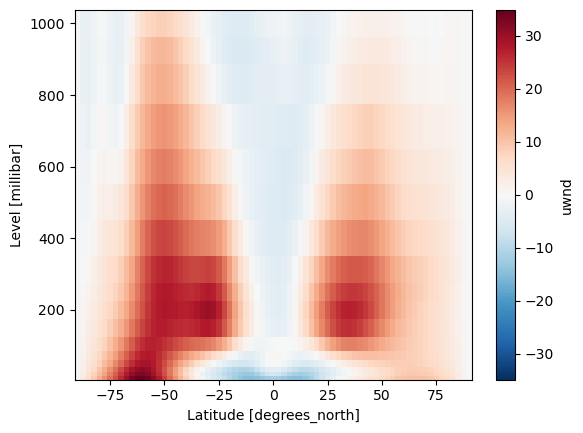

In [4]:
# plot zonal and annual average 
u_lat_ann.plot()

Text(0, 0.5, 'Pressure (hPa)')

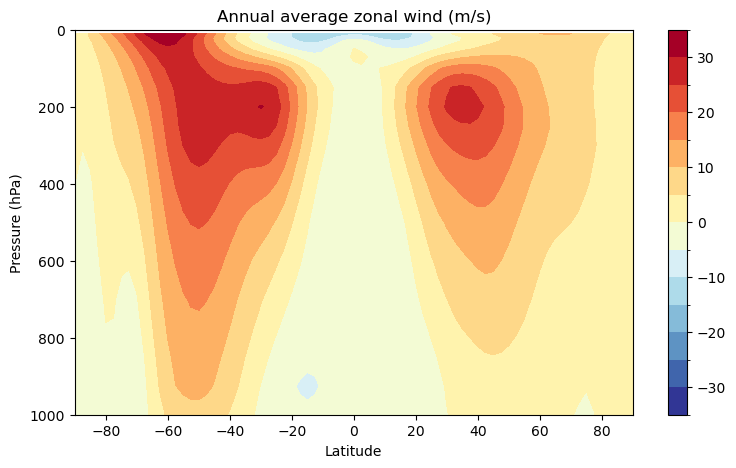

In [5]:
# Make a prettier plot
lev1=np.arange(-35,40,5)
# color map
cmap1=plt.cm.RdYlBu_r

fig1 = plt.figure(figsize=(9,5))
cs=u_lat_ann.plot.contourf(levels=lev1, cmap=cmap1, add_labels=False)
plt.title('Annual average zonal wind (m/s)')
plt.ylim(1000,0)
plt.xlabel('Latitude')
plt.ylabel('Pressure (hPa)')

### Problem 1
Explain the distribution of annual and zonal average of the zonal wind.

### Creating a line plot of upper atmospheric u

In [6]:
#Let's check the level
ds1.level

<xarray.DataArray 'level' (level: 17)>
array([1000.,  925.,  850.,  700.,  600.,  500.,  400.,  300.,  250.,  200.,
        150.,  100.,   70.,   50.,   30.,   20.,   10.], dtype=float32)
Coordinates:
  * level    (level) float32 1e+03 925.0 850.0 700.0 ... 50.0 30.0 20.0 10.0
Attributes:
    units:         millibar
    long_name:     Level
    positive:      down
    GRIB_id:       100
    GRIB_name:     hPa
    actual_range:  [1000.   10.]
    axis:          Z

In [7]:
#Let's find a level closest to 200 hPa.
np.argmin((ds1.level.data-200)**2) #ds1.level.data becomes a numpy array

9

In [8]:
#let's check
ds1.level[9]

<xarray.DataArray 'level' ()>
array(200., dtype=float32)
Coordinates:
    level    float32 200.0
Attributes:
    units:         millibar
    long_name:     Level
    positive:      down
    GRIB_id:       100
    GRIB_name:     hPa
    actual_range:  [1000.   10.]
    axis:          Z

### Problem 2
Plot the zonal wind at 200 hPa.  

## Stream function

In [9]:
# Let's first calculate mass stream function
lat=ds1.lat.values
ny = len(lat)
nlev= len(ds1.level)
p=ds1.level.values
pf=np.zeros(nlev+1) # pressure at the boundary
pf[0]=p[0]
pf[1:nlev]=(p[:nlev-1]+p[1:nlev])/2.
pf[nlev]=2.  # arbtrary low value
print(ny,nlev,len(p),pf)

g = 9.8
a = 6.37e6
cosphi = np.cos(lat*np.pi/180.)

73 17 17 [1000.   962.5  887.5  775.   650.   550.   450.   350.   275.   225.
  175.   125.    85.    60.    40.    25.    15.     2. ]


In [10]:
dp = np.zeros((nlev-1))
dp[0:nlev-1] = abs(pf[0:nlev-1]-pf[1:nlev])*100.
print(dp)

[ 3750.  7500. 11250. 12500. 10000. 10000. 10000.  7500.  5000.  5000.
  5000.  4000.  2500.  2000.  1500.  1000.]


In [17]:
psi = np.zeros((nlev-1,ny))
print(psi.shape)
for j in range(ny):
    for k in range(nlev-2,0,-1):
        psi[k-1,j] = psi[k,j] + 2.*np.pi*a*cosphi[j]*v_lat_ann.values[k,j]/g*dp[k]*1.e-10

(16, 73)


Text(0.5, 1.0, 'Mass streamfunction [x10^10 kg/s]')

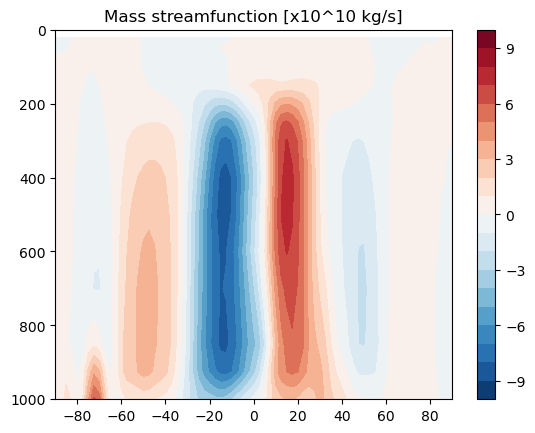

In [18]:
cmap1=plt.cm.RdBu_r
Lat,Lev=np.meshgrid(lat,p[0:nlev-1])
lev1=np.arange(-10,11,1)
plt.contourf(Lat, Lev, psi, lev1, cmap=cmap1)
plt.colorbar()

plt.ylim([1000,0])
plt.title('Mass streamfunction [x10^10 kg/s]')

### Problem 3
Explain the distribution of general circulation using the distribution of stream function plot above.